# Wikipedia Library

In [110]:
# import the library
import wikipedia as wp

In [29]:
# create a page object for the NG wikipedia page
ng = wp.page('Northrop Grumman')

In [112]:
# get the url of the page
url = ng.url
url

'https://en.wikipedia.org/wiki/Northrop_Grumman'

In [97]:
# get a summary of the page
summary = wp.summary(ng)
summary

"Northrop Grumman Corporation is an American multinational aerospace and defense technology company. With 90,000 employees and an annual revenue in excess of $30 billion, it is one of the world's largest weapons manufacturers and military technology providers. The firm ranks No.\u202f101 on the 2022 Fortune 500 list of America's largest corporations.Northrop Grumman and its industry partners have won the Collier Trophy eight times, most recently for developing the X-47B, the first unmanned, autonomous air system to operate from an aircraft carrier.Northrop Grumman currently leads the development of the B-21 Raider, a long-range, stealth strategic bomber that can drop conventional and nuclear weapons; it will replace Northrop's own B-2 Spirit, the world's only known stealth bomber. Among its other current projects are development and production of the James Webb Space Telescope, an orbiting observatory launched in 2021, and production of the solid rocket boosters for NASA's Space Launch

In [98]:
# abbreviated summary
summary = wp.summary(ng, sentences=2)
summary

"Northrop Grumman Corporation is an American multinational aerospace and defense technology company. With 90,000 employees and an annual revenue in excess of $30 billion, it is one of the world's largest weapons manufacturers and military technology providers."

In [101]:
# the links function gets all the links on the page
# these are other wikipedia articles
# display the first 10
ng.links[0:10]

['ABC News',
 'ADM-160 MALD',
 'AN/AAQ-37',
 'AN/APG-68',
 'AN/APG-77',
 'AN/APG-78 Longbow',
 'AN/APG-80',
 'AN/APG-81',
 'AN/APG-83',
 'AN/SPQ-9']

In [41]:
# get the image urls from the page
ng.images

['https://upload.wikimedia.org/wikipedia/commons/5/53/Ambox_current_red_Americas.svg',
 'https://upload.wikimedia.org/wikipedia/commons/e/e3/Antares_A-ONE_launch.1..jpg',
 'https://upload.wikimedia.org/wikipedia/commons/6/68/Aviacionavion.png',
 'https://upload.wikimedia.org/wikipedia/commons/3/34/B-2_Spirit_-_060530-F-5040D-320.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/2/27/Cygnus_5_departing_during_Expedition_46_%28187136%29.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/e/ed/Decrease2.svg',
 'https://upload.wikimedia.org/wikipedia/commons/4/47/Flag_of_Virginia.svg',
 'https://upload.wikimedia.org/wikipedia/commons/9/9d/Global_Hawk_1.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/b/b0/Increase2.svg',
 'https://upload.wikimedia.org/wikipedia/commons/2/2a/Industry5.svg',
 'https://upload.wikimedia.org/wikipedia/commons/4/47/James_Webb_Space_Telescope_2009_top.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/5/57/LA_Skyline_Mountains2.jpg',
 'https://u

In [96]:
# get the references from the reference section
ng.references

['http://www.dpc.sa.gov.au/__data/assets/pdf_file/0018/33282/CMAX-Communications-Pty-Ltd-Change-of-Details-9-April-2018.pdf',
 'http://antennaassociates.com/index.php',
 'http://aviationweek.com/world-satellite-business-week/northrop-buy-orbital-more-9b',
 'http://articles.chicagotribune.com/2001-10-30/news/0110300253_1_two-former-northrop-employees-defense-fraud-case-criminal-probe',
 'http://www.cnn.com/2015/10/27/politics/long-range-strike-bomber-northrop-grumman/',
 'http://www.computerworld.com/s/article/9192481/The_Top_Green_IT_Organizations_Green_from_the_ground_up',
 'http://www.defenseindustrydaily.com/2005/08/britain-issues-12b-e3d-awacs-support-contract/index.php',
 'http://www.defensenews.com/articles/army-falls-behind-bringing-new-missile-defense-command-system-online',
 'http://www.defensenews.com/sgmlparse2.php?F=archive2/20030707/atpc5480771.sgml',
 'http://www.dodbuzz.com/2015/09/29/air-force-delays-new-bomber-contract-by-couple-of-months/',
 'http://www.flightglobal.c

In [53]:
# helper function to display svg images
from IPython.display import SVG, display
def show_svg(url):
    display(SVG(url))

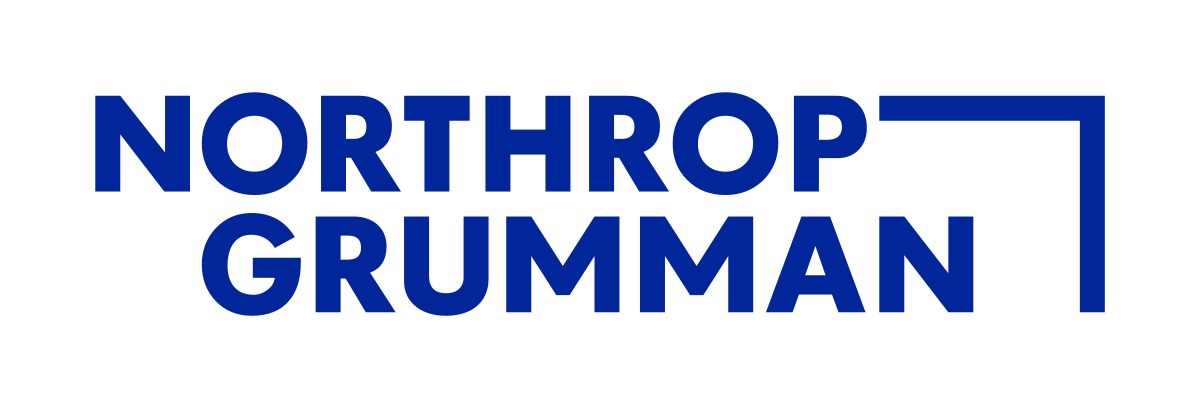

In [109]:
# displaying one image
show_svg(ng.images[13])

In [66]:
# get all the svg images
images = [x for x in ng.images if x.endswith('svg')]

# Wikipedia API Library

In [87]:
import wikipediaapi
wiki_wiki = wikipediaapi.Wikipedia('en')
ng_new = wiki_wiki.page('Northrop Grumman')

In [89]:
ng_new.summary

"Northrop Grumman Corporation is an American multinational aerospace and defense technology company. With 90,000 employees and an annual revenue in excess of $30 billion, it is one of the world's largest weapons manufacturers and military technology providers. The firm ranks No.\u202f101 on the 2022 Fortune 500 list of America's largest corporations.Northrop Grumman and its industry partners have won the Collier Trophy eight times, most recently for developing the X-47B, the first unmanned, autonomous air system to operate from an aircraft carrier.Northrop Grumman currently leads the development of the B-21 Raider, a long-range, stealth strategic bomber that can drop conventional and nuclear weapons; it will replace Northrop's own B-2 Spirit, the world's only known stealth bomber. Among its other current projects are development and production of the James Webb Space Telescope, an orbiting observatory launched in 2021, and production of the solid rocket boosters for NASA's Space Launch

In [92]:
ng_new.title

'Northrop Grumman'

In [113]:
# code will not compile
# cannot get references directly with this library
#ng_new.references

In [94]:
# test code to attempt to get external links
import wikipediaapi
# Create a Wikipedia API object
wiki = wikipediaapi.Wikipedia('en')
# Get the page for the Python programming language
page = wiki.page('Python (programming language)')
# Get the external links in the article
external_links = []
for link in page.links:
    if link.startswith('http'):
        external_links.append(link)
# Print the external links
print(external_links)

[]
